## 1. Veri Setini Yükleme ve Anlama

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import missingno  
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, f1_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
from sklearn import ensemble
from sklearn.metrics import confusion_matrix as cm

filterwarnings('ignore')

from matplotlib.legend_handler import HandlerLine2D

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/IDSA Second Project/tablet.csv")

In [ ]:
df.head(5)

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [ ]:
df.shape

(2000, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

Veri setinin ne kadar dengeli olduğunu görüntüleyelim.

In [ ]:
df["FiyatAraligi"].value_counts()

Normal      500
Pahalı      500
Ucuz        500
Çok Ucuz    500
Name: FiyatAraligi, dtype: int64

Veri setimizdeki boş değerleri ve sayısal değerler için temel istatistik değerleri görüntüleyelim. Bu değerler eksik verilerle ilgili işlemlerde işimize yarayacak.

In [ ]:
df.isna().sum()  #12 adet RAM ve 5 adet ön kamera bilgisinde eksik veri olduğu görülmektedir.

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [ ]:
corr=df.corr()
corr

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.011482,0.032167,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000883,0.052510
MikroislemciHizi,0.011482,1.000000,-0.000172,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003969,-0.011432
OnKameraMP,0.032167,-0.000172,1.000000,-0.028642,-0.001723,0.024585,-0.013721,0.645697,-0.010662,-0.005646,0.012528,-0.007121
DahiliBellek,-0.004004,0.006545,-0.028642,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032883,-0.002790
Kalinlik,0.034085,-0.014364,-0.001723,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.007293,0.017003
Agirlik,0.001844,0.012350,0.024585,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002536,0.006209
CekirdekSayisi,-0.029727,-0.005724,-0.013721,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.005576,0.013148
ArkaKameraMP,0.031441,-0.005245,0.645697,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.029540,0.014657
CozunurlukYükseklik,0.014901,-0.014523,-0.010662,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.023421,-0.010645
CozunurlukGenislik,-0.008402,-0.009476,-0.005646,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.002101,0.006720


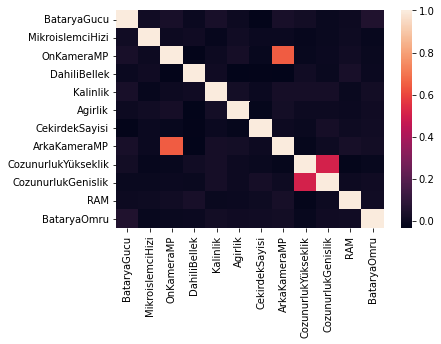

In [ ]:
corr = df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)


1. Tablonun neredeyse tamamına yakını siyah renkte dolayısıyla öznitelikler arasındaki ilişki yok denecek kadar az.
2. OnKameraMP ve ArkaKameraMP korelasyonu 0,64 ile dikkate değer duruyor.
3. CozunurlukYukseklik ve CozunurlukGenislik değerlerinin arasındaki ilişki zayıf olsada bir ilişki olduğu gözlenmektedir.



In [ ]:
df.cov()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,193088.359838,4.116922,61.358674,-31.923572,4.319702,28.689738,-29.885322,83.782186,2905.736870,-1595.644609,-4.201834e+02,126.075334
MikroislemciHizi,4.116922,0.665863,-0.000610,0.096914,-0.003381,0.356738,-0.010686,-0.025955,-5.259133,-3.341841,3.508705e+00,-0.050970
OnKameraMP,61.358674,-0.000610,18.853786,-2.257164,-0.002159,3.776743,-0.136295,16.992930,-20.563638,-10.606717,5.881467e+01,-0.168940
DahiliBellek,-31.923572,0.096914,-2.257164,329.266971,0.036037,-21.977567,-1.175291,-3.661448,84.080518,-65.366654,6.464887e+02,-0.276650
Kalinlik,4.319702,-0.003381,-0.002159,0.036037,0.083184,0.222125,-0.002312,0.045969,3.233478,2.937617,-2.275414e+00,0.026794
Agirlik,28.689738,0.356738,3.776743,-21.977567,0.222125,1253.135567,-1.537873,4.045314,14.756486,1.373327,-9.730043e+01,1.200861
CekirdekSayisi,-29.885322,-0.010686,-0.136295,-1.175291,-0.002312,-1.537873,5.234197,-0.016547,-6.977203,24.205785,1.380876e+01,0.164357
ArkaKameraMP,83.782186,-0.025955,16.992930,-3.661448,0.045969,4.045314,-0.016547,36.775916,-49.694829,10.997543,1.939416e+02,0.485661
CozunurlukYükseklik,2905.736870,-5.259133,-20.563638,84.080518,3.233478,14.756486,-6.977203,-49.694829,196941.408040,97946.365509,-1.123601e+04,-25.812594
CozunurlukGenislik,-1595.644609,-3.341841,-10.606717,-65.366654,2.937617,1.373327,24.205785,10.997543,97946.365509,186796.361941,9.821991e+02,15.869264


Sayısal değişkenlerin dağılımlarını inceleyelim.

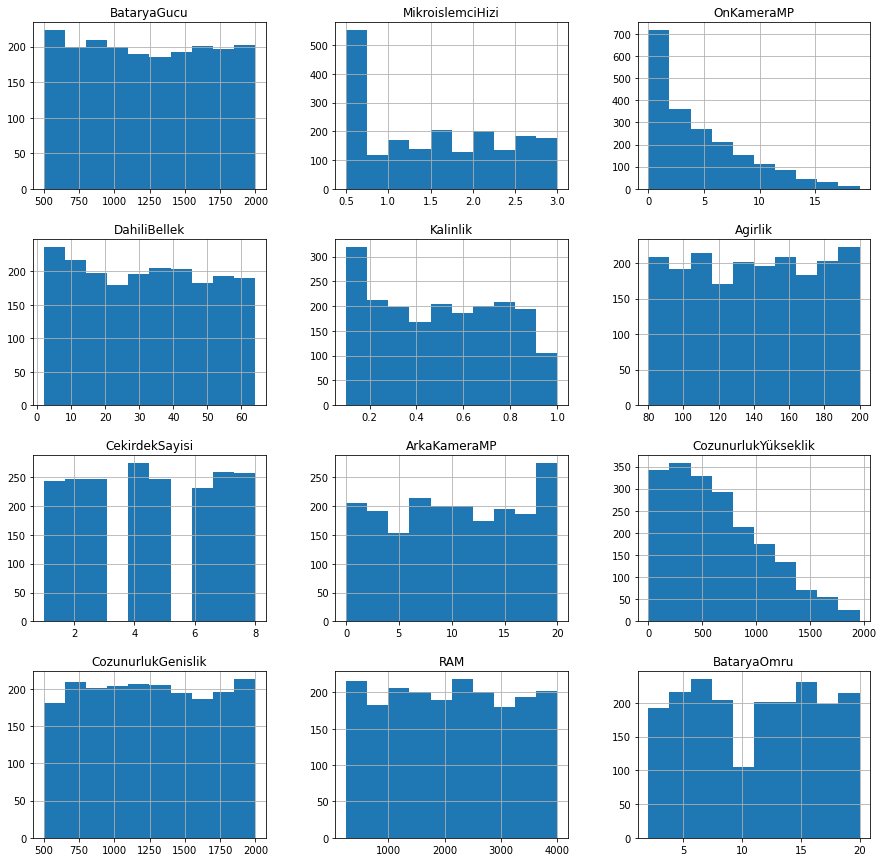

In [ ]:
df.hist(figsize=(15,15));
plt.show()

## 2. EDA & Feature Engineering

Öncelikle veri setimizde eksik verileri dolduralım. Eksik verilerin az olduğu için ortalama değerlerle doldurma yolunu izleyelim.

In [ ]:
eksik_OnKameraMP=df[df["OnKameraMP"].isnull()].index
eksik_OnKameraMP

Int64Index([351, 726, 792, 1416, 1641], dtype='int64')

In [ ]:
df.loc[eksik_OnKameraMP,"OnKameraMP"]=4.312281

In [ ]:
eksik_RAM = df[df["RAM"].isnull()].index
eksik_RAM

Int64Index([87, 169, 310, 329, 658, 777, 871, 961, 965, 1180, 1779, 1804], dtype='int64')

In [ ]:
df.loc[eksik_RAM,"RAM"]=2116.243964

In [ ]:
df.isna().sum()


BataryaGucu            0
Bluetooth              0
MikroislemciHizi       0
CiftHat                0
OnKameraMP             0
4G                     0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
3G                     0
Dokunmatik             0
WiFi                   0
FiyatAraligi           0
Renk                   0
dtype: int64

Veri setimizde kategorik değişkenler bulunuyordu. Bu değişkenleri sayısal değişkenlere çevirelim.

In [ ]:
df["Renk"].unique() 
#Renk e ait benzersiz değerleri görüntüleyelim.

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

In [ ]:
df_Renk = pd.get_dummies(df["Renk"], prefix = "-", prefix_sep='Renk-', dummy_na=False, columns=None,dtype=None)
df_Renk   
#get_dummies yardımıyla Renk'e dair kategorik öznitelik çıkarımlarında bulunduk.
#Çünkü Renk lerin birbirine üstünlüğü yok, nominaller. Ordinal değil.

,-Renk-Beyaz,-Renk-Gri,-Renk-Kahverengi,-Renk-Kırmızı,-Renk-Mavi,-Renk-Mor,-Renk-Pembe,-Renk-Sarı,-Renk-Siyah,-Renk-Turkuaz,-Renk-Turuncu,-Renk-Yeşil
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,1,0,0,0
1996,0,0,0,0,0,0,0,1,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,1,0
1998,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df = pd.concat([df,df_Renk], axis=1)
df = df.drop("Renk", axis = 1)
df
# df veri setimizle yukarida olusturdugumuz df_Renk veri setimizi birlestirerek tek tablo haline getirdik.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,-Renk-Kahverengi,-Renk-Kırmızı,-Renk-Mavi,-Renk-Mor,-Renk-Pembe,-Renk-Sarı,-Renk-Siyah,-Renk-Turkuaz,-Renk-Turuncu,-Renk-Yeşil
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,...,0,0,0,0,0,0,1,0,0,0
1996,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,...,0,0,0,0,0,1,0,0,0,0
1997,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,...,0,0,0,0,0,0,0,0,1,0
1998,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
categories=pd.Categorical(df['OnKameraMP'],ordered=True)  
print(categories)
#Ordinal değerleri inceledik

[2.0, 0.0, 1.0, 1.0, 1.0, ..., 3.0, 1.0, 4.0, 4.0, 5.0]
Length: 2000
Categories (21, float64): [0.0 < 1.0 < 2.0 < 3.0 ... 16.0 < 17.0 < 18.0 < 19.0]


In [ ]:
categories = pd.Categorical(df['DahiliBellek'],ordered=True)
print(categories)

[50, 58, 16, 50, 18, ..., 7, 11, 56, 53, 26]
Length: 2000
Categories (63, int64): [2 < 3 < 4 < 5 ... 61 < 62 < 63 < 64]


In [ ]:
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Çok Ucuz",0)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Ucuz",1)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Normal",2)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Pahalı",3)

In [ ]:
df.replace("Yok",0,inplace=True)   
df.replace("Var",1,inplace=True)

In [ ]:
df
#df veri setimizi tekrar görüntüledik.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,-Renk-Kahverengi,-Renk-Kırmızı,-Renk-Mavi,-Renk-Mor,-Renk-Pembe,-Renk-Sarı,-Renk-Siyah,-Renk-Turkuaz,-Renk-Turuncu,-Renk-Yeşil
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,0,1.3,1,1.0,0,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,0,0.5,1,1.0,1,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,0,1.0,0,1.0,0,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,0,2.9,1,3.0,1,7,0.8,147,2,...,0,0,0,0,0,0,1,0,0,0
1996,1654,0,1.8,0,1.0,0,11,0.3,146,7,...,0,0,0,0,0,1,0,0,0,0
1997,742,0,2.2,1,4.0,0,56,0.2,190,7,...,0,0,0,0,0,0,0,0,1,0
1998,704,0,2.2,1,4.0,0,53,0.2,186,6,...,0,0,0,0,0,0,0,1,0,0


## 3. Machine Learning


Makine öğrenmesi modellemeleri yapabilmek için hedef değişkenimiz olan “FiyatAraligi” değişkeni ve bu değişkeni tahmin etmemize yardımcı olacak diğer değişkenleri bağımlı ve bağımsız değişkenler olmak üzere ikiye ayırıyoruz.

X = Bağımsız değişkenler
Y = Bağımlı değişkenler




In [ ]:
X = df.drop("FiyatAraligi", axis = 1)
Y = df["FiyatAraligi"]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

Regresyon Modellerini eğitelim.
1.   İlk olarak Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(X_train,Y_train)


GaussianNB()

In [ ]:
nb.score(X_train,Y_train)


0.769375


2.   Lineer Regression



In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train,Y_train)


LinearRegression()

In [ ]:
lm.score(X_test,Y_test)


0.9124342244893862


3.   Logistic Regression



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

KNN yakın komşuları KNN yakın komşuları, sınıflandırma ve regresyon için kullanılan parametrik olmayan bir yöntemdir. Kullanılan en kolay ML tekniğinden biridir. Yerel yaklaşıma sahip tembel bir öğrenme modelidir.

Komşu sayısı 2'den 15'e kadar denenerek hepsi için skor değerler elde edilerek görselleştirilir.



In [ ]:
error_rate = []
for i in range(2,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

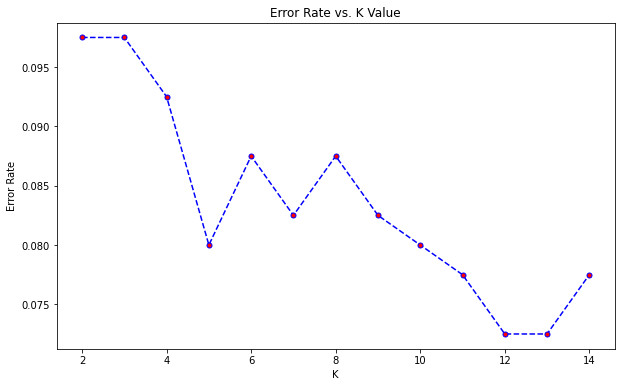

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,Y_train)


LogisticRegression()

In [ ]:
logmodel.score(X_test,Y_test)


0.64


4.   Karar Ağacı Modeli

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
dtree.fit(X_train,Y_train)


DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
dtree.score(X_test,Y_test)

0.8625

In [ ]:
feature_names=['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMp', '4G',
       'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi', 'ArkaKameraMP', 'CozunurlukYükseklik',
       'CozunurlukGenislik', 'RAM', 'BataryaOmru', '3G', 'BataryaOmru', 'Dokunmatik',
       'WiFi', 'FiyatAraligi']


5.   Rastgele Ağaç Modeli



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.score(X_test,Y_test)


0.8725

Yapılan incelemeler sonucunda KNN ve Lineer Regression en iyi sonucu verdi.

## 4. Model Oluşturma

Lineer Regresion için;

In [ ]:
y_pred=lm.predict(X_test)


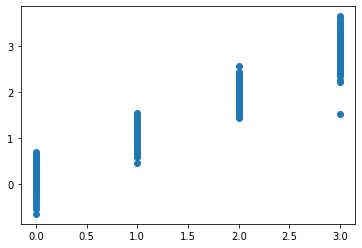

In [ ]:
plt.scatter(Y_test,y_pred)


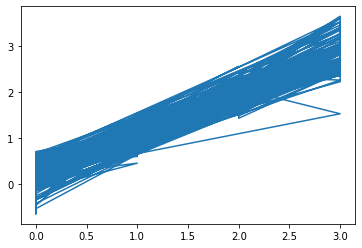

In [ ]:
plt.plot(Y_test,y_pred)

KNN için;

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
pred = knn.predict(X_test)


In [ ]:
print(classification_report(Y_test,pred))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       109
           1       0.91      0.89      0.90       100
           2       0.89      0.91      0.90        97
           3       0.96      0.93      0.94        94

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [ ]:
matrix=confusion_matrix(Y_test,pred)
print(matrix)

[[105   4   0   0]
 [  7  89   4   0]
 [  0   5  88   4]
 [  0   0   7  87]]


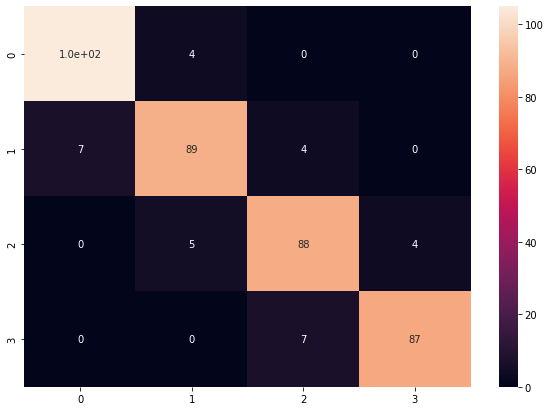

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

Fiyat tahmini için tanımladığımız 0,1,2,3 değerleri için virgülden sonra çok fazla değer içereceği için knn daha kullanışlı bir model gibi gözüküyor. Model için KNN'yi tercih edelim.

In [ ]:
data_test=pd.DataFrame(df)

In [ ]:
data_test.head()


,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,-Renk-Kahverengi,-Renk-Kırmızı,-Renk-Mavi,-Renk-Mor,-Renk-Pembe,-Renk-Sarı,-Renk-Siyah,-Renk-Turkuaz,-Renk-Turuncu,-Renk-Yeşil
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,0,1.3,1,1.0,0,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,0,0.5,1,1.0,1,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,0,1.0,0,1.0,0,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Fiyat_tahmini=knn.predict(X_test)


In [ ]:
Fiyat_tahmini

array([1, 0, 2, 1, 2, 2, 3, 1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 3, 2, 0, 0, 2, 2, 1, 3,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 1, 0, 1, 2, 3, 1, 1, 2, 2, 3, 0,
       1, 0, 0, 2, 1, 3, 0, 1, 1, 3, 2, 3, 2, 1, 0, 0, 2, 2, 1, 3, 2, 1,
       0, 0, 0, 1, 0, 1, 3, 2, 2, 3, 1, 3, 0, 0, 1, 2, 2, 1, 1, 2, 0, 3,
       1, 0, 2, 1, 1, 0, 2, 2, 0, 0, 3, 2, 3, 1, 1, 3, 3, 1, 1, 1, 2, 2,
       0, 3, 0, 2, 3, 2, 2, 0, 1, 3, 0, 0, 0, 1, 3, 0, 3, 0, 3, 0, 1, 3,
       3, 1, 3, 0, 2, 0, 3, 2, 0, 0, 2, 3, 2, 3, 2, 3, 3, 3, 0, 2, 3, 1,
       0, 2, 2, 1, 3, 3, 0, 0, 3, 1, 0, 2, 2, 3, 0, 2, 3, 2, 0, 2, 1, 1,
       0, 2, 3, 3, 3, 0, 0, 1, 0, 2, 3, 1, 3, 0, 3, 0, 0, 3, 2, 2, 0, 2,
       3, 3, 3, 2, 2, 3, 0, 0, 2, 1, 0, 1, 3, 3, 3, 1, 1, 1, 1, 0, 1, 3,
       1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 3, 2, 3, 3, 0, 2, 0, 3, 0, 2, 0, 3,
       1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 3, 2, 3, 2, 3, 3, 2, 0, 3, 0, 1, 1,
       2, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0,

In [ ]:
data_test

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,-Renk-Kahverengi,-Renk-Kırmızı,-Renk-Mavi,-Renk-Mor,-Renk-Pembe,-Renk-Sarı,-Renk-Siyah,-Renk-Turkuaz,-Renk-Turuncu,-Renk-Yeşil
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,0,1.3,1,1.0,0,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,0,0.5,1,1.0,1,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,0,1.0,0,1.0,0,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,0,2.9,1,3.0,1,7,0.8,147,2,...,0,0,0,0,0,0,1,0,0,0
1996,1654,0,1.8,0,1.0,0,11,0.3,146,7,...,0,0,0,0,0,1,0,0,0,0
1997,742,0,2.2,1,4.0,0,56,0.2,190,7,...,0,0,0,0,0,0,0,0,1,0
1998,704,0,2.2,1,4.0,0,53,0.2,186,6,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data_test['FiyatAraligi']= pd.Series(Fiyat_tahmini)

In [ ]:
data_test


,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,-Renk-Kahverengi,-Renk-Kırmızı,-Renk-Mavi,-Renk-Mor,-Renk-Pembe,-Renk-Sarı,-Renk-Siyah,-Renk-Turkuaz,-Renk-Turuncu,-Renk-Yeşil
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,0,1.3,1,1.0,0,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,0,0.5,1,1.0,1,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,0,1.0,0,1.0,0,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,0,2.9,1,3.0,1,7,0.8,147,2,...,0,0,0,0,0,0,1,0,0,0
1996,1654,0,1.8,0,1.0,0,11,0.3,146,7,...,0,0,0,0,0,1,0,0,0,0
1997,742,0,2.2,1,4.0,0,56,0.2,190,7,...,0,0,0,0,0,0,0,0,1,0
1998,704,0,2.2,1,4.0,0,53,0.2,186,6,...,0,0,0,0,0,0,0,1,0,0
